# IBP MCMC inference
Adapted from David Andrzejewski's code on https://github.com/davidandrzej/PyIBP

Based on the paper http://mlg.eng.cam.ac.uk/pub/pdf/DosGha09a.pdf

Speed up achieved by rewriting functions using numba

In [15]:
import scipy.io as sio
from tqdm.auto import tqdm
from PyIBP_fast import PyIBP
import matplotlib.pyplot as plt
from scaledimage import scaledimage
import numpy as np

In [16]:
# IBP parameter (gamma hyperparameters)
(alpha, alpha_a, alpha_b) = (1., 1., 1.)
# Observed data Gaussian noise (Gamma hyperparameters)
(sigma_x, sx_a, sx_b) = (1., 1., 1.)
# Latent feature weight Gaussian noise (Gamma hyperparameters)
(sigma_a, sa_a, sa_b) = (1., 1., 1.)

### Number of full sampling sweeps

In [24]:
numsamp = 50

### Load the data

In [25]:
matvals = sio.loadmat('input/block_image_set.mat')
trueWeights = matvals['trueWeights']
features = matvals['features']
data = matvals['data']

### Center the data

In [26]:
(N,D) = data.shape
cdata = PyIBP.centerData(data)

### Initialize the model

In [27]:
f = PyIBP(cdata,(alpha,alpha_a,alpha_b),
        (sigma_x, sx_a, sx_b),
        (sigma_a, sa_a, sa_b))

Sample report includes:
"iter",
"collapsed_loglike",
"K", "alpha", "sigma_x", "sigma_a"

In [28]:
%%time
# Do inference
log_lik = np.zeros(numsamp)

for s in tqdm(range(numsamp)):
    f.fullSample()
    d = f.sample_report(s)
    log_lik[s] = d["collapsed_loglike"]

  0%|          | 0/50 [00:00<?, ?it/s]

Wall time: 3.57 s


#### Plots

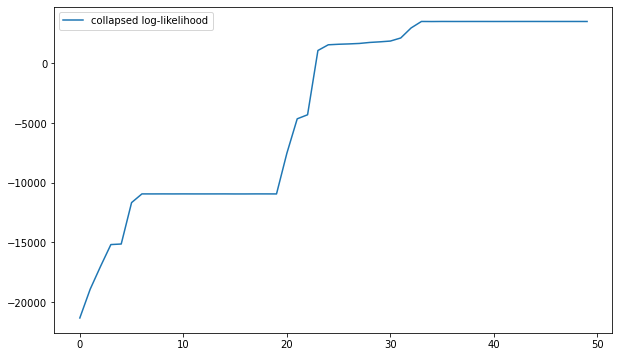

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(log_lik, label="collapsed log-likelihood")
ax.legend()
plt.show()

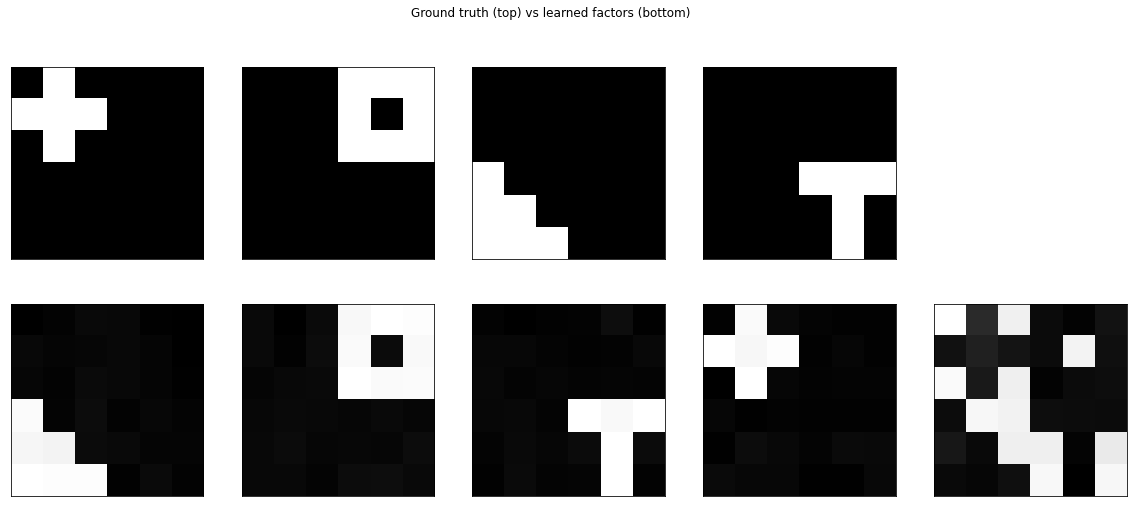

In [30]:
K = max(len(trueWeights), len(f.weights()))
fig, subaxes = plt.subplots(2, K, figsize=(20,8))
for sa in subaxes.flatten():
    sa.set_visible(False)
fig.suptitle('Ground truth (top) vs learned factors (bottom)')
for (idx, trueFactor) in enumerate(trueWeights):
    ax = subaxes[0, idx]
    ax.set_visible(True)
    scaledimage(trueFactor.reshape(6,6),
                pixwidth=3, ax=ax)
for (idx, learnedFactor) in enumerate(f.weights()):
    ax = subaxes[1, idx]    
    scaledimage(learnedFactor.reshape(6,6),
                pixwidth=3, ax=ax)
    ax.set_visible(True)
plt.show()    